In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

import lightkurve

from astropy.table import Table, join, Column
% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [70]:
stars = Table.read('../data/output_1000stars.txt',format='ascii')
kics = ['%09d' %  kic for kic in stars['ID']]

### Download data


In [72]:
preamble = "wget -q -nH --cut-dirs=6 -r -l0 -c -N -np -R 'index*' -erobots=off " 

with open('../data/download_kics.txt','w') as f:
    for kic in kics:
        url = "http://archive.stsci.edu/pub/kepler/lightcurves/%s/%s/" %  (kic[:4], kic)
        f.write(preamble+url+'\n')


### Can we cut it into chunks?

In [106]:
def get_chunks(lc,duration=48):
    ffs, tts = [],[]
    flat = lc.remove_outliers(sigma=2.5).flatten()
    flat.fill_gaps()
    
    time, flux = flat.time, flat.flux
    flux /= np.nanmedian(flux)
    t0 = np.nanmin(time)

    for day in range(len(time) // duration):
        tts.append(time[day*duration:(day+1)*duration])
        ffs.append(flux[day*duration:(day+1)*duration])
        
    return tts, ffs 

In [107]:
fnames = glob.glob('../data/*%s*.fits' % '010651320')
lc = lightkurve.open(fnames[9]).PDCSAP_FLUX
tts, ffs = get_chunks(lc)

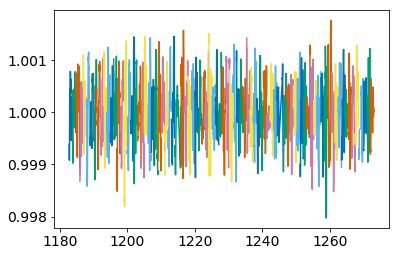

In [108]:
for j, ff in enumerate(ffs):
    plt.plot(tts[j],ff)

### Chunk everything